In [3]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
import os

In [4]:
house = pd.read_csv('data/train.csv', index_col = 0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.shape

(1460, 80)

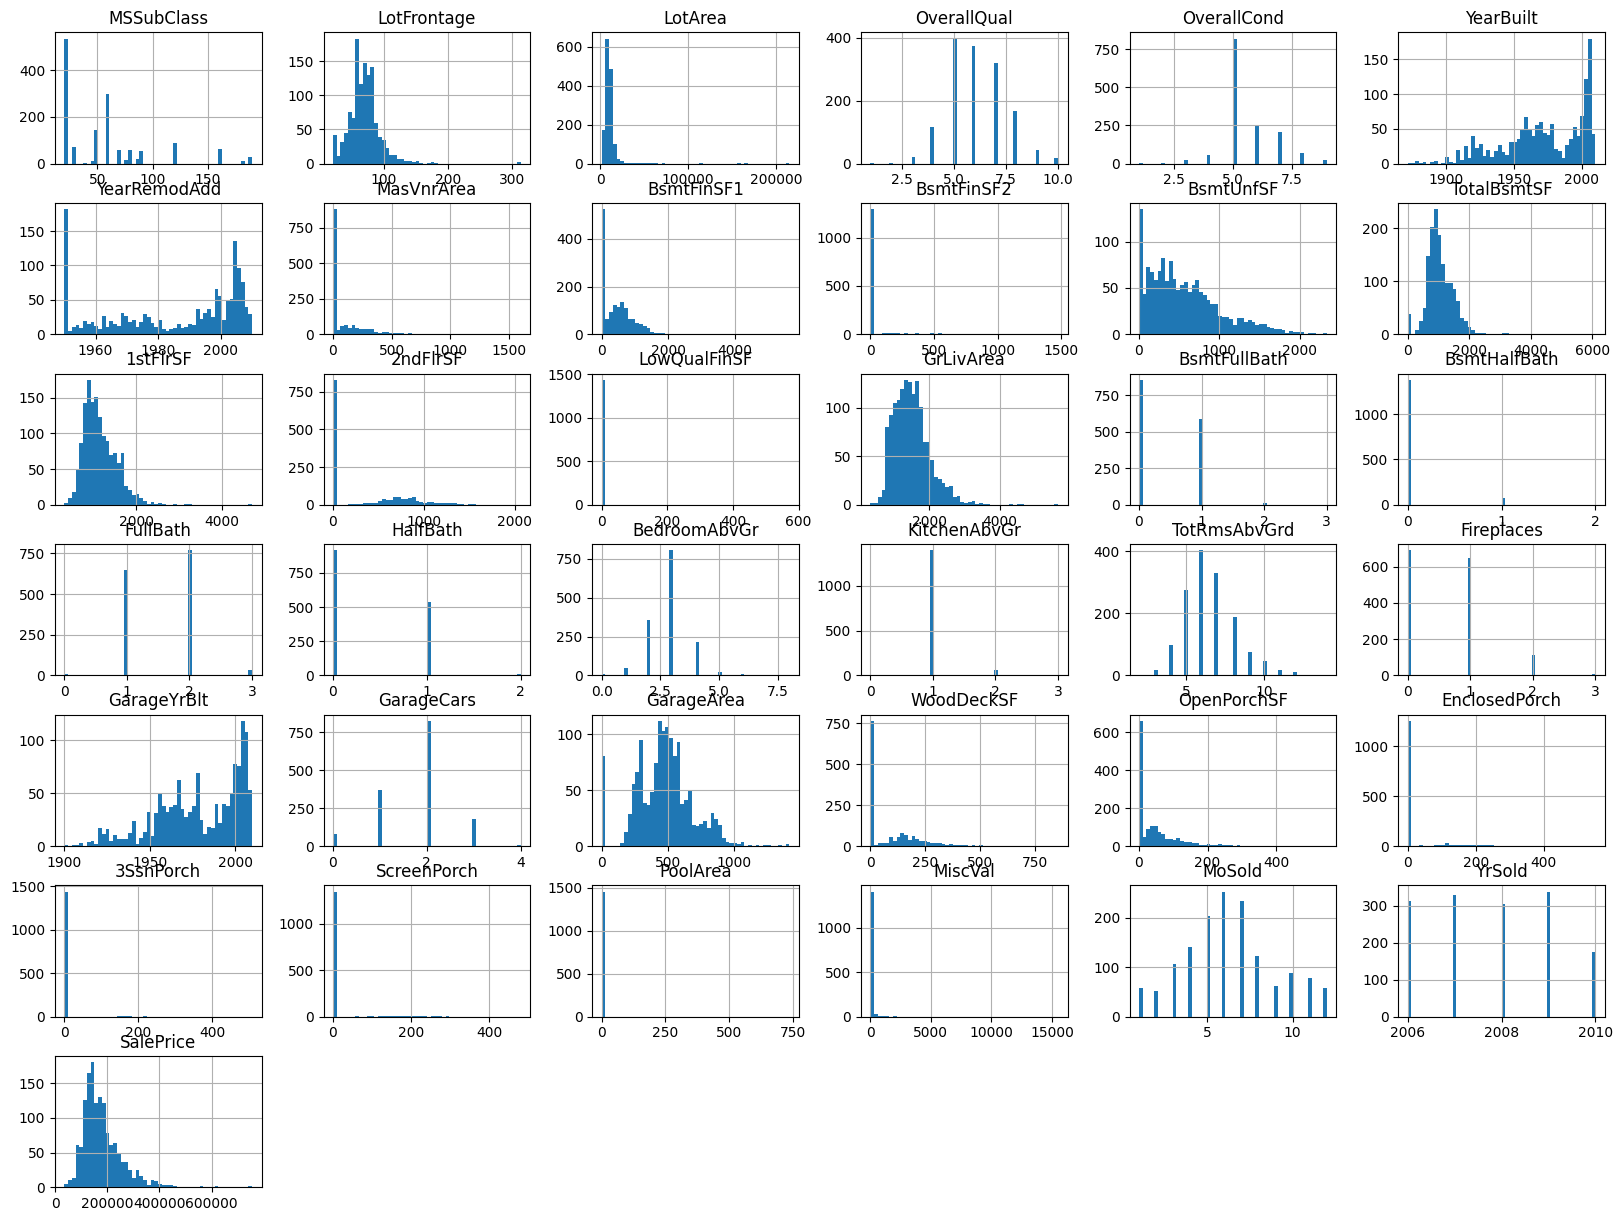

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [12]:
house.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1969,1969,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,602,LwQ,438,14,1054,GasA,Gd,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2,460,TA,TA,Y,180,0,0,0,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal,151000
310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274,Unf,0,622,1896,GasA,Ex,Y,SBrkr,1944,0,0,1944,1,0,2,0,3,1,Ex,8,Typ,3,Ex,Attchd,2003.0,Fin,3,708,TA,TA,Y,208,175,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
325,80,RL,96.0,11275,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,PosN,Norm,1Fam,SLvl,7,7,1967,2007,Mansard,WdShake,Wd Sdng,Wd Sdng,BrkFace,300.0,Gd,Gd,CBlock,Gd,TA,No,Unf,0,Unf,0,710,710,GasA,Ex,Y,SBrkr,1898,1080,0,2978,0,0,2,1,5,1,Gd,11,Typ,1,Gd,BuiltIn,1961.0,Fin,2,564,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,242000


In [13]:
house.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [14]:
house_value_counts = dict()
for i in house.columns.values.tolist():
    house_value_counts[i] = house[i].value_counts()

In [15]:
house_value_counts

{'MSSubClass': MSSubClass
 20     536
 60     299
 50     144
 120     87
 30      69
 160     63
 70      60
 80      58
 90      52
 190     30
 85      20
 75      16
 45      12
 180     10
 40       4
 Name: count, dtype: int64,
 'MSZoning': MSZoning
 RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: count, dtype: int64,
 'LotFrontage': LotFrontage
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
         ... 
 137.0      1
 141.0      1
 38.0       1
 140.0      1
 46.0       1
 Name: count, Length: 110, dtype: int64,
 'LotArea': LotArea
 7200     25
 9600     24
 6000     17
 9000     14
 8400     14
          ..
 14601     1
 13682     1
 4058      1
 17104     1
 9717      1
 Name: count, Length: 1073, dtype: int64,
 'Street': Street
 Pave    1454
 Grvl       6
 Name: count, dtype: int64,
 'Alley': Alley
 Grvl    50
 Pave    41
 Name: count, dtype: int64,
 'LotShape': LotShape
 Reg    925
 IR1    484
 IR2     41
 IR

In [9]:
check_corr = list()
for i, v in house_value_counts.items():
    if v.values[:1] > 1200:
        print(i, v.values[:1])
        check_corr.append(i)

Street [1454]
LandContour [1311]
Utilities [1459]
LandSlope [1382]
Condition1 [1260]
Condition2 [1445]
BldgType [1220]
RoofMatl [1434]
ExterCond [1282]
BsmtCond [1311]
BsmtFinType2 [1256]
BsmtFinSF2 [1293]
Heating [1428]
CentralAir [1365]
Electrical [1334]
LowQualFinSF [1434]
BsmtHalfBath [1378]
KitchenAbvGr [1392]
Functional [1360]
GarageQual [1311]
GarageCond [1326]
PavedDrive [1340]
EnclosedPorch [1252]
3SsnPorch [1436]
ScreenPorch [1344]
PoolArea [1453]
MiscVal [1408]
SaleType [1267]


In [33]:
len(check_corr)

28

In [49]:
drop_cols = [x for x in check_corr]

In [10]:
has_corr = dict()
for i in check_corr:
    if pd.api.types.is_numeric_dtype(house[i].dtype):
        has_corr[i] = house.corr(numeric_only = True)[i].sort_values(ascending = False)

In [11]:
for i, v, in has_corr.items():
    print(f'{i} has {v.values[1:2][0]} the best positive correlation with {v.index.values[1:2][0]}')
    print(f'{i} has {v.values[-2:-1][0]} the best negative correlation with {v.index.values[-2:-1][0]}')
    print('----------------------------------------------------------------------------------------')

BsmtFinSF2 has 0.15867806078170135 the best positive correlation with BsmtFullBath
BsmtFinSF2 has -0.09926031602264425 the best negative correlation with 2ndFlrSF
----------------------------------------------------------------------------------------
LowQualFinSF has 0.13468281300660076 the best positive correlation with GrLivArea
LowQualFinSF has -0.09447952015593257 the best negative correlation with GarageCars
----------------------------------------------------------------------------------------
BsmtHalfBath has 0.11782091508139253 the best positive correlation with OverallCond
BsmtHalfBath has -0.09580428815248283 the best negative correlation with BsmtUnfSF
----------------------------------------------------------------------------------------
KitchenAbvGr has 0.2817210402648814 the best positive correlation with MSSubClass
KitchenAbvGr has -0.17480024561497706 the best negative correlation with YearBuilt
------------------------------------------------------------------------

<Axes: >

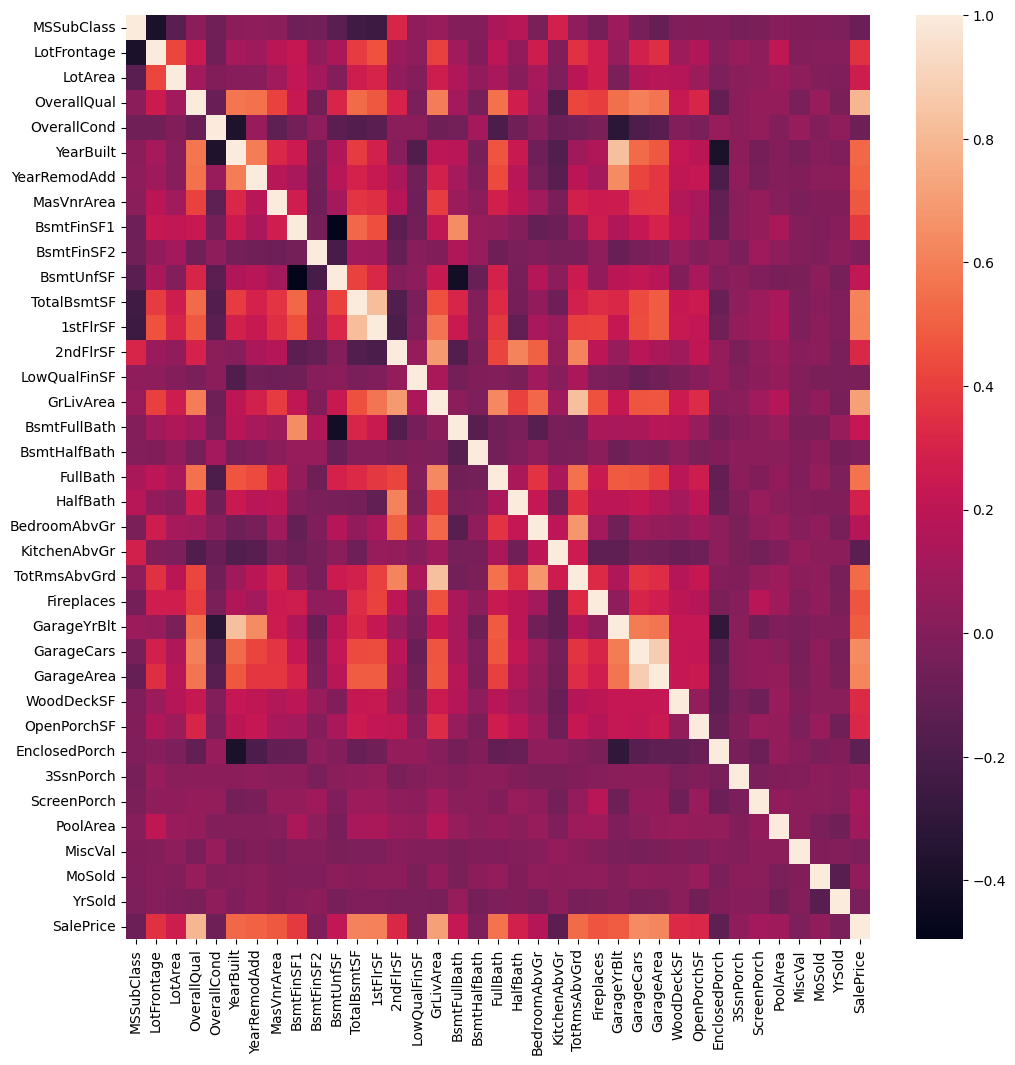

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
house_corr = house.corr(numeric_only = True)
plt.figure(figsize = (12,12))
sns.heatmap(house_corr)

In [13]:
house.corr(numeric_only = True)['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [14]:
house['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

<Axes: >

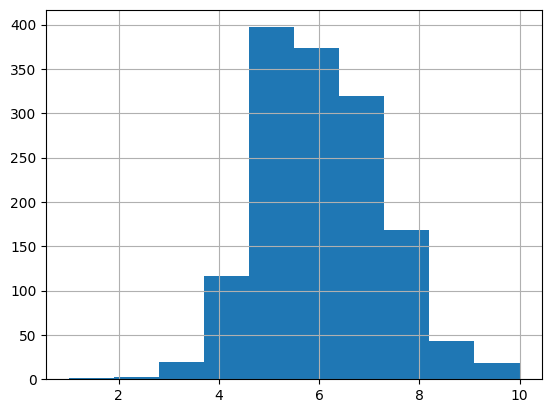

In [15]:
house['OverallQual'].hist()

<Axes: >

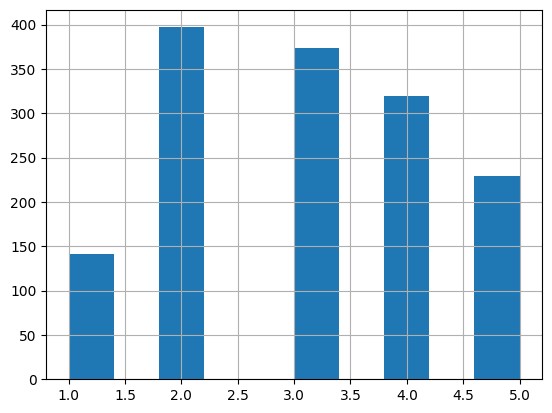

In [16]:
house['QualCategory'] = pd.cut(
    house['OverallQual'],
    bins = [0, 4, 5, 6, 7, np.inf],
    labels = [1,2,3,4,5]
)

house['QualCategory'].hist()

<Axes: xlabel='GrLivArea'>

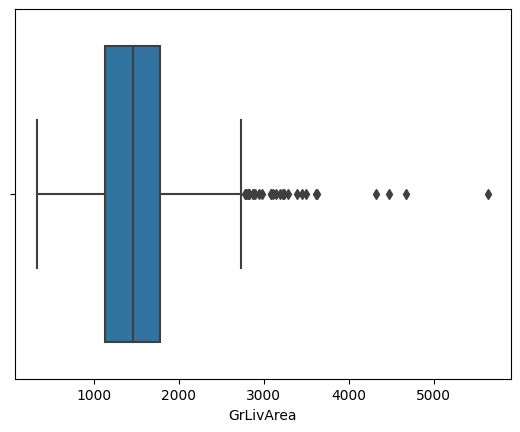

In [17]:
# house.plot(kind = 'box', x = 'SalePrice', y = 'GrLivArea')
sns.boxplot(data = house, x  = 'GrLivArea')

<Axes: >

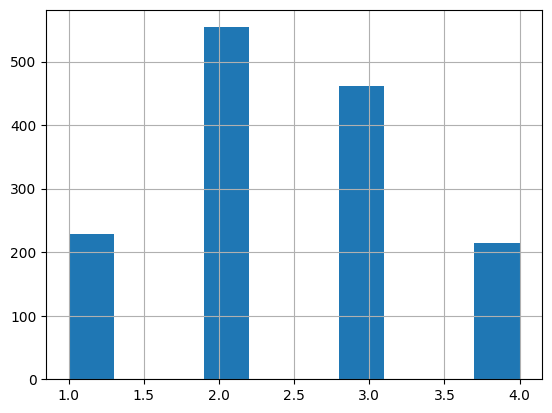

In [18]:
# GrLivArea: Above grade (ground) living area square feet
house['GrLivAreaRF'] = pd.cut(
    house['GrLivArea'] / 1000,
    bins = [0.5, 1, 1.5, 2, np.inf],
    labels = [1,2,3,4]
)

house['GrLivAreaRF'].hist()

In [19]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
# for train_index, test_index in split.split(house, house['QualCategory']):
#     strat_train_set = house.iloc[train_index],
#     strat_test_set = house.iloc[test_index]

In [20]:
# strat_test_set['QualCategory'].value_counts() / len(strat_test_set)

In [21]:
# strat_test_set.head()

In [22]:
# strat_train_set

In [23]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(house, test_size = 0.2, random_state = 42, stratify = house[['QualCategory', 'GrLivAreaRF']])
strat_train_set = strat_train_set.reset_index().drop('Id', axis = 1)
strat_train_set.index.name = 'Id'
print(strat_train_set.shape)
strat_train_set.head()

(1168, 82)


/home/okechukwu/Dev/jupyter/venv/lib/python3.10/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QualCategory,GrLivAreaRF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,CBlock,CBlock,NaN,0.0,Fa,TA,PConc,TA,TA,No,ALQ,315,Rec,105,420,840,GasA,Ex,Y,SBrkr,840,534,0,1374,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1967.0,Fin,1,338,TA,TA,Y,0,0,198,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,105000,1,2
1,60,RL,NaN,9531,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,706,Unf,0,88,794,GasA,Ex,Y,SBrkr,882,914,0,1796,1,0,2,1,3,1,TA,7,Typ,0,NaN,Attchd,1998.0,RFn,2,546,TA,TA,Y,0,36,0,0,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,211000,3,3
2,20,RL,NaN,14781,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,178.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1787,0,0,1787,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,3,748,TA,TA,Y,198,150,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,275000,5,3
3,20,RL,85.0,14331,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,630.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274,Unf,0,526,1800,GasA,Ex,Y,SBrkr,1800,0,0,1800,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,3,765,TA,TA,Y,270,78,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,312500,5,3
4,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,7,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,Stone,108.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0,Unf,0,1710,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,2,550,TA,TA,Y,100,48,0,0,180,0,NaN,NaN,NaN,0,4,2009,WD,Normal,240000,4,3


In [24]:
print(strat_test_set.shape)
strat_test_set.head()

(292, 82)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QualCategory,GrLivAreaRF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,TA,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,NaN,Detchd,1928.0,Unf,1,216,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500,1,1
1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000,1,NaN
544,120,RH,34.0,4058,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,TwnhsE,SFoyer,7,5,1998,1998,Gable,CompShg,MetalSd,MetalSd,BrkFace,182.0,TA,TA,PConc,Gd,TA,Av,GLQ,584,LwQ,139,0,723,GasA,Ex,Y,SBrkr,767,0,0,767,1,0,1,0,1,1,TA,4,Typ,0,NaN,Attchd,1998.0,Fin,1,367,TA,TA,Y,120,40,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,133000,4,1
49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000,1,2
707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000,4,3


In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(['QualCategory', 'GrLivAreaRF'], axis = 1, inplace = True)

In [26]:
print('QualCategory' in strat_train_set.columns)
print('GrLivAreaRF' in strat_train_set.columns)

False
False


In [27]:
# corr_matrix = strat_train_set.corr(numeric_only = True)
# corr_matrix['SalePrice'].sort_values(ascending = False)

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabe

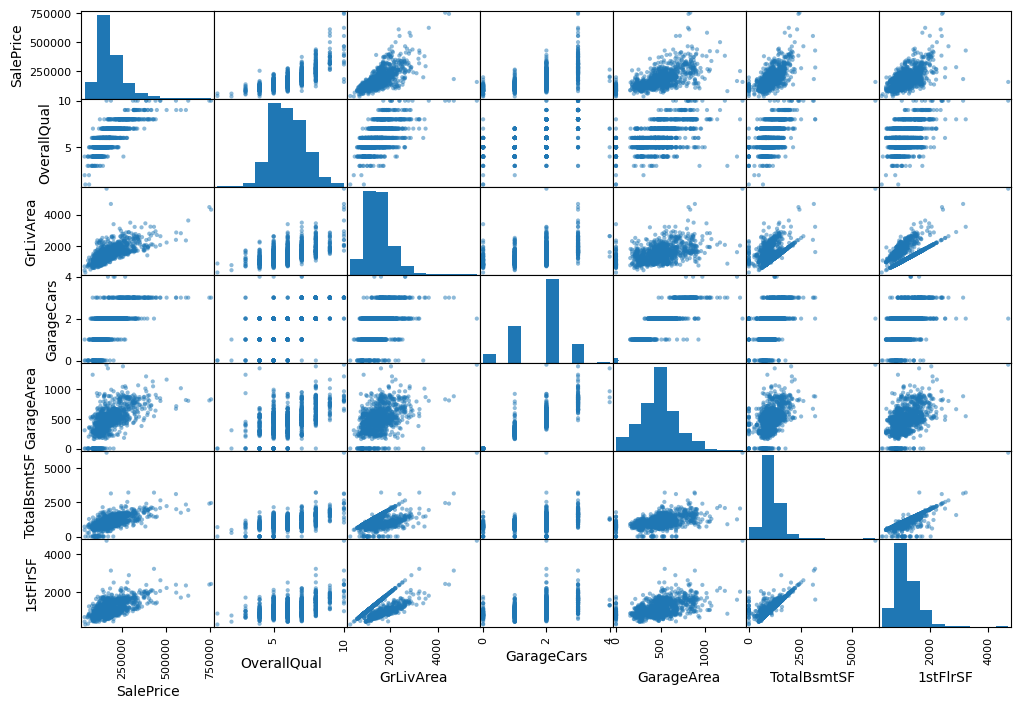

In [28]:
from pandas.plotting import scatter_matrix
attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
scatter_matrix(strat_train_set[attributes], figsize = (12,8))

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

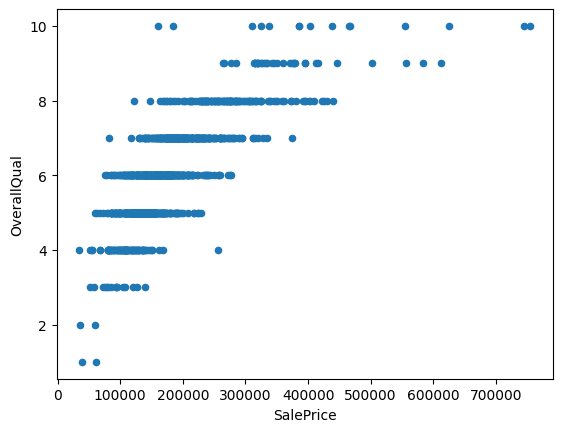

In [29]:
strat_train_set.plot(kind = 'scatter', x = 'SalePrice', y = 'OverallQual')
# import seaborn as sns
# sns.barplot(strat_train_set, x = 'SalaPrice', y = 'OverallQual', bins = 10)

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

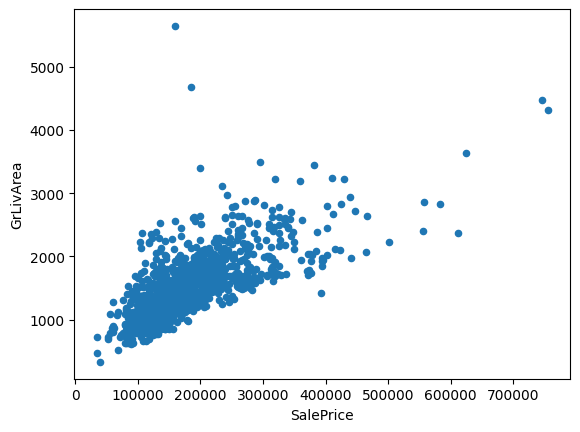

In [30]:
strat_train_set.plot(kind = 'scatter', x = 'SalePrice', y = 'GrLivArea')

In [31]:
OverallQual_to_be_dropped = strat_train_set[strat_train_set['OverallQual'] <= 2].index.values
OverallQual_to_be_dropped

array([ 650,  753,  828, 1155])

Text(0, 0.5, 'Price scaled by 10000')

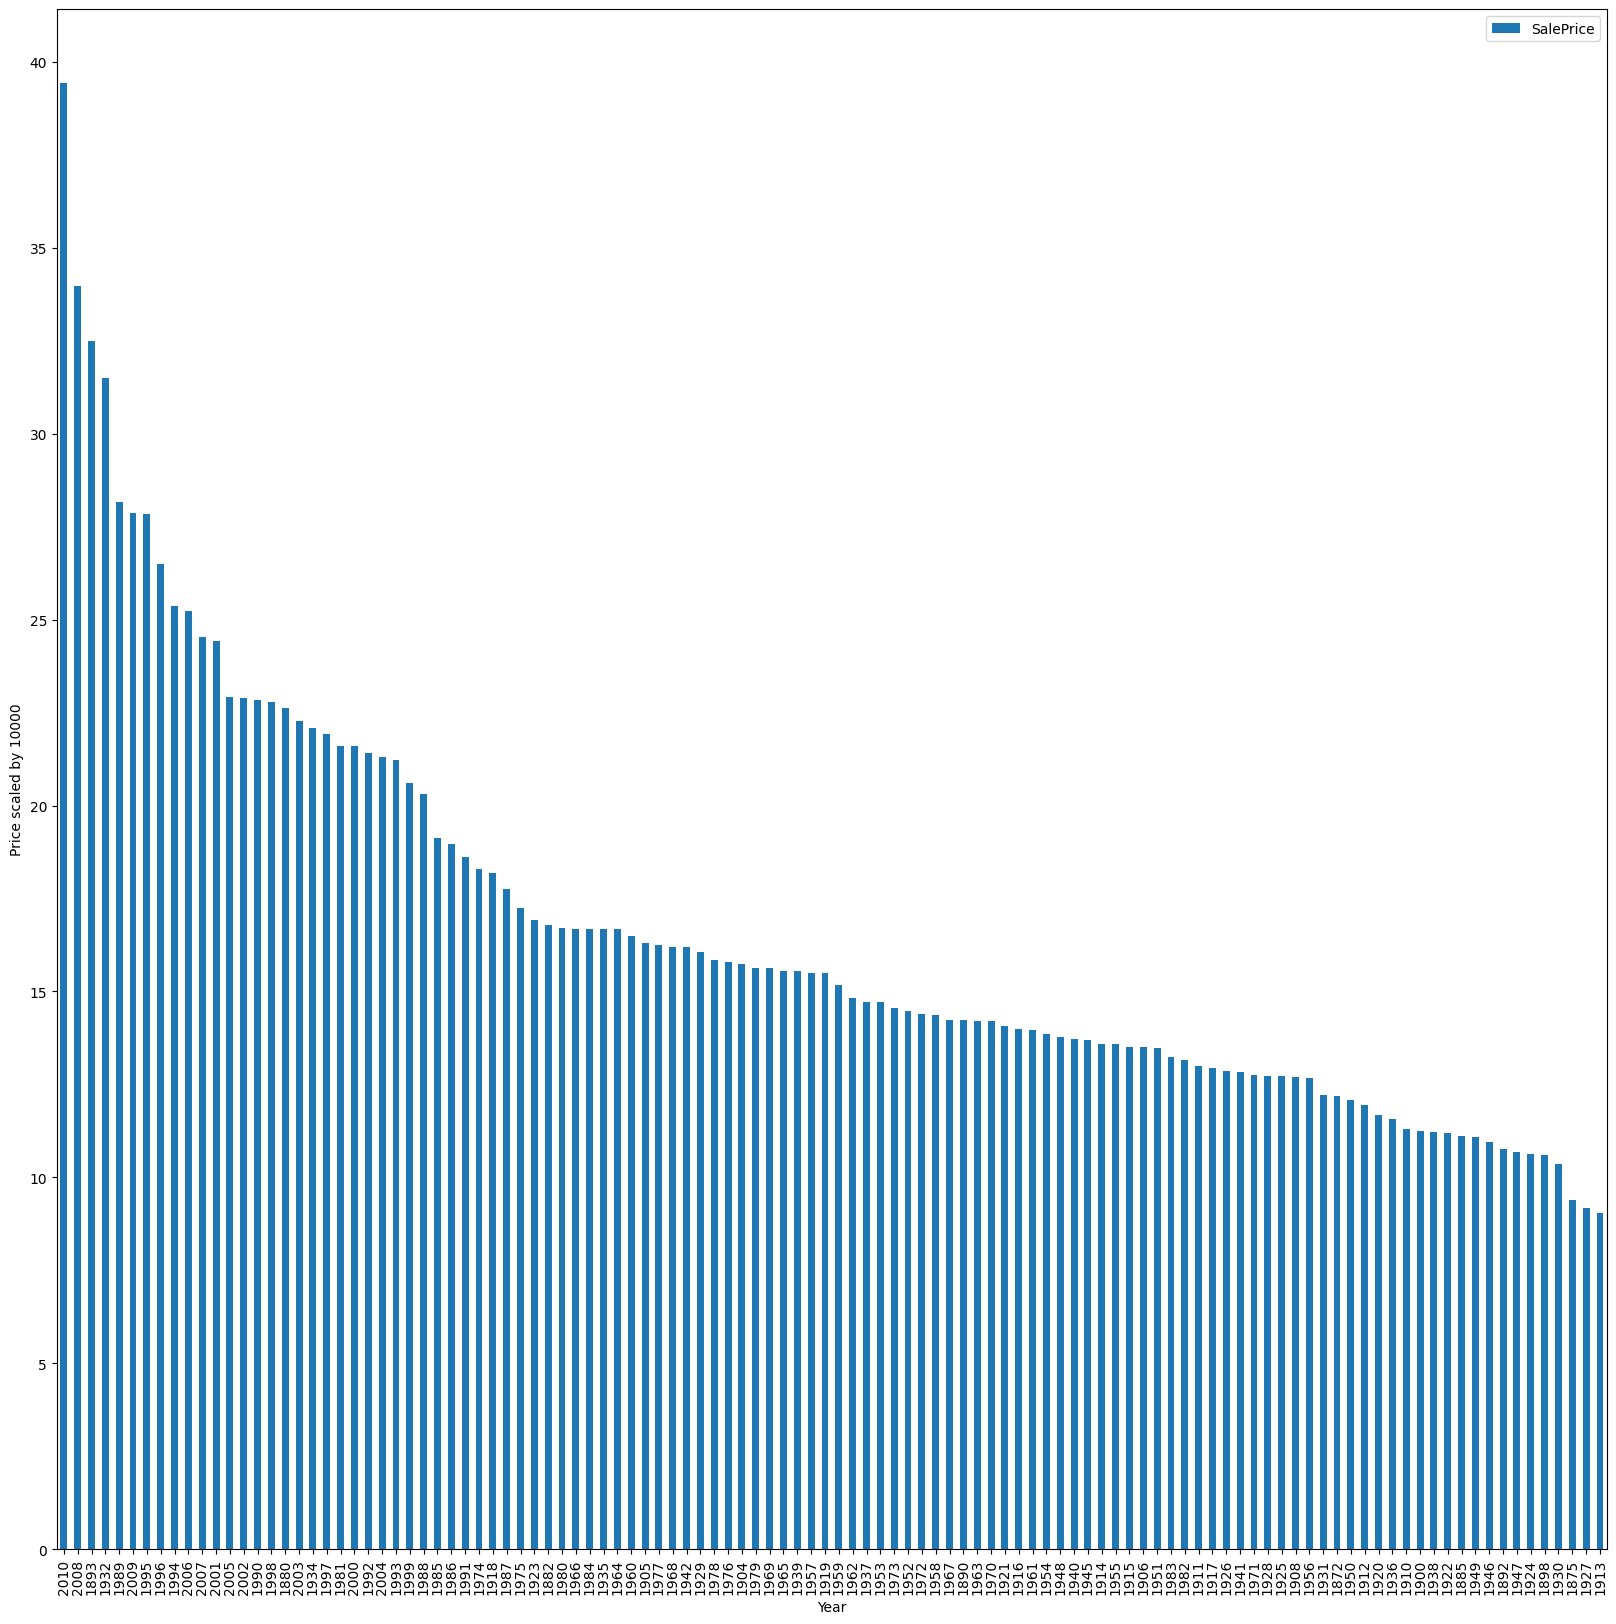

In [74]:
yrBuilt_to_price = strat_train_set.pivot_table(
    'SalePrice',
    index = 'YearBuilt',
    aggfunc = 'mean'
).sort_values(by = 'SalePrice', ascending= False)
# yrBuilt_to_price.plot.bar(figsize = (20,20))
ax = (yrBuilt_to_price/10000).plot.bar(figsize = (20,20))
ax.set_xlabel('Year')
ax.set_ylabel('Price scaled by 10000')

* We can see that the price reduces proportionally to an increase in the year built

[Text(0.5, 1.0, 'Sum Year Sold Plot')]

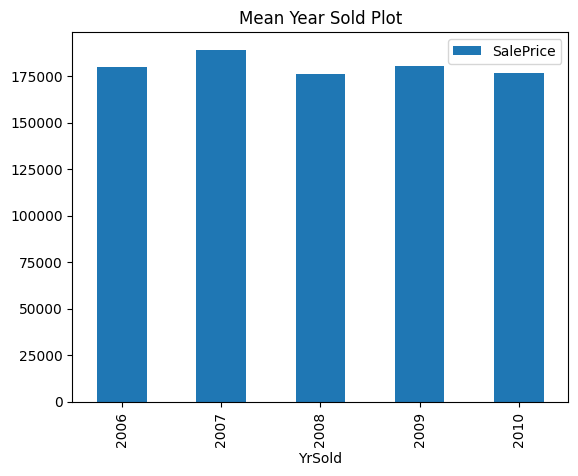

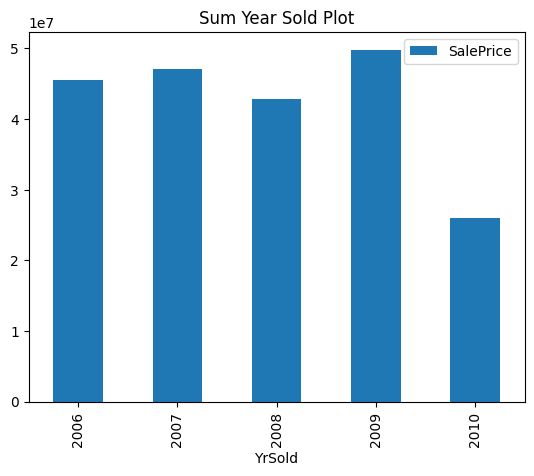

In [93]:
yrSold_to_price_mean = strat_train_set.pivot_table(
    'SalePrice',
    index = 'YrSold',
    aggfunc = 'mean'
)
yrSold_to_price_sum = strat_train_set.pivot_table(
    'SalePrice',
    index = 'YrSold',
    aggfunc = 'sum'
)
# yrSold_to_price
ax1 = yrSold_to_price_mean.plot(kind = 'bar')
ax1.set(title = 'Mean Year Sold Plot')
ax2 = yrSold_to_price_sum.plot(kind = 'bar')
ax2.set(title = 'Sum Year Sold Plot')

# sort_values(by = 'SalePrice', ascending= False).plot(kind = 'bar')

* We can also see through the mean that increase in year sold does not matter that much
* But from the some plot we see that the latest year has the lowest Price which is weird so lets check the distribution of the year in the dataset

In [96]:
strat_train_set['YrSold'].value_counts()

YrSold
2009    276
2006    253
2007    249
2008    243
2010    147
Name: count, dtype: int64

* We can now see that the latest year namely `2010` has only `147` occurances compared to the next lowest `2008` which has `243` occurances which is a whole `39.5%` greater than `2010`

* Let us now divide our training set into their respective categories

In [ ]:
train_num_set = strat_train_set.select_dtypes(include = ['number'])
train_cat_set = strat_train_set.select_dtypes(exclude = ['number'])

In [ ]:
house_prices_cols = strat_train_set.columns
divided_cols = np.concatenate((train_num_set.columns.values, train_cat_set.columns.values))
len(house_prices_cols), len(divided_cols)

In [ ]:
columns = strat_train_set.columns.values.tolist()
num_indexed_columns = dict()
for i, v in enumerate(columns):
    num_indexed_columns[v] = i
# print(num_indexed_columns)

In [ ]:
eererer

In [ ]:
columns_most_impact = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']


In [ ]:
house_prices_num[columns_most_impact].corr()

In [ ]:
house_prices.shape

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
FullBath, HalfBath, BsmtFullBath, BsmtHalfBath = num_indexed_columns['FullBath'], num_indexed_columns.get('HalfBath'), num_indexed_columns.get('BsmtFullBath'), num_indexed_columns.get('BsmtHalfBath')
YearBuilt, YrSold = num_indexed_columns.get('YearBuilt'),num_indexed_columns.get('YrSold') 
LotArea, GrLivArea = num_indexed_columns.get('LotArea'), num_indexed_columns.get('GrLivArea')
WoodDeckSF, OpenPorchSF, EnclosedPorch, ThreeSsnPorch, ScreenPorch = num_indexed_columns.get('WoodDeckSF'), num_indexed_columns.get('OpenPorchSF'), num_indexed_columns.get('EnclosedPorch'), num_indexed_columns.get('3SsnPorch'), num_indexed_columns.get('ScreenPorch') 
Fireplaces, MiscVal, PoolArea = num_indexed_columns.get('Fireplaces'), num_indexed_columns.get('MiscVal'), num_indexed_columns.get('PoolArea')
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bsmt_bathrooms = True):
        self.add_bsmt_bathrooms = add_bsmt_bathrooms
    def fit(self, X, y = None):
        return self
    def transform(self, X, y=None):
        TotalOutdoorSF = X[:, WoodDeckSF]+X[:, OpenPorchSF]+X[:, EnclosedPorch]+X[:, ThreeSsnPorch]+X[:, ScreenPorch]
        TotalArea = X[:, LotArea] + X[:, GrLivArea]
        Age = X[:, YearBuilt] - X[:, YrSold]
        TotalBathrooms_exbsmt = X[:, FullBath] + X[:, HalfBath]
        if self.add_bsmt_bathrooms:
            TotalBathrooms = X[:, FullBath] + X[:, HalfBath] + X[:, BsmtFullBath] + X[:, BsmtHalfBath]
            return np.c_[X, TotalBathrooms, TotalArea, TotalOutdoorSF, abs(Age)]
        else:
            return np.c_[X, TotalBathrooms_exbsmt, TotalArea, TotalOutdoorSF, abs(Age)]

In [ ]:
class ColumnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [ ]:
to_be_dropped_num = ['Fireplaces', 'MiscVal', 'PoolArea', 'LotFrontage']
to_be_dropped_cat = ['FireplaceQu', 'MiscFeature', 'Alley', 'PoolQC', 'Fence']

In [ ]:
num_drop_index = list()
for index, value in enumerate(house_prices_num.columns.values.tolist()):
    if value in to_be_dropped_num:
        num_drop_index.append(index)
num_drop_index

In [ ]:
cat_drop_index = list()
for index, value in enumerate(house_prices_cat.columns.values.tolist()):
    if value in to_be_dropped_cat:
        cat_drop_index.append(index)
cat_drop_index

In [ ]:
num_cols = house_prices_num.columns.values.tolist()
valid_num_cols = [i for i in num_cols if i not in to_be_dropped_num]
print(f'Valid_num_formatted_len: {len(valid_num_cols)}, Valid_num_original_len: {len(num_cols)}')

cat_cols = house_prices_cat.columns.values.tolist()
valid_cat_cols = [i for i in cat_cols if i not in to_be_dropped_cat]
print(f'Valid_num_formatted_len: {len(valid_cat_cols)}, Valid_num_original_len: {len(cat_cols)}')

In [ ]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'constant', fill_value = 0)),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ('dropped_num', ColumnDropperTransformer(to_be_dropped_num))
])

In [ ]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'constant', fill_value = 'NA')),
    ('One_hot', OneHotEncoder()),
    ('dropped_num', ColumnDropperTransformer(to_be_dropped_cat))
])

# housing_cat_tr = cat_pipeline.fit_transform(house_prices_cat)
# housing_cat_tr.shape

In [ ]:
full_pipeline = ColumnTransformer([
#     ('num', num_pipeline, (num_pipeline, make_column_selector(pattern=f'^(?!{num_drop_index})'))),
    ('num', num_pipeline, valid_num_cols),
    ('cat', cat_pipeline, valid_cat_cols)
])

house_prices_prepared = full_pipeline.fit_transform(house_prices)

In [ ]:
hp_num_attribs = pd.DataFrame(housing_num_tr.tolist(), columns = house_prices_num.columns.values.tolist() + added_columns)
hp_num_attribs.head()

In [ ]:
num_corr = hp_num_attribs[columns_most_impact+added_columns].corr(numeric_only  = True)
plt.figure(figsize = (8,8))
sns.heatmap(num_corr, annot = True)
#Total Area not needed
#Total Outdoor SF not needed

In [ ]:
print(1460-1201)
print(f'LotFrontage is missing {(259/1460) * 100: .2f}% data')
print(1460-770)
print(f'FireplaceQu is missing {(690/1460)*100: .2f}% data')
print(1460-281)
print(f'Fence is missing {(1179/1460)*100: .2f}% data')

In [ ]:
to_be_dropped_num = ['Fireplaces', 'MiscVal', 'PoolArea', 'LotFrontage']
to_be_dropped_cat = ['FireplaceQu', 'MiscFeature', 'Alley', 'PoolQC', 'Fence']



In [ ]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, valid_num_cols),
    ('cat', cat_pipeline, valid_cat_cols)
])

house_prices_prepared = full_pipeline.fit_transform(house_prices)